# Pandas Basics <hr style= "border:2.5px solid #126782"></hr> 

Data Analyst: Marc Lester Salvador <br> Department: Electrical Engineering


# DataFrame

In [52]:
%pip install pandas-- upgrade

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'pandas--': Expected end or semicolon (after name and no valid version specifier)
    pandas--
          ^


In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [39]:
data = {
        "name":['jerry','jonah','john'],
        "age":[22,21,34],
        "sex": ['M','F','M']
}
data

{'name': ['jerry', 'jonah', 'john'],
 'age': [22, 21, 34],
 'sex': ['M', 'F', 'M']}

In [40]:
df = pd.DataFrame(data)
df

,name,age,sex
0,jerry,22,M
1,jonah,21,F
2,john,34,M


In [47]:
df['age']

0    22
1    21
2    34
Name: age, dtype: int64

In [48]:
df['age'].sum()

77

In [49]:
df['age'].mean()

25.666666666666668

In [50]:
df['name']

0    jerry
1    jonah
2     john
Name: name, dtype: object

In [51]:
df['sex']

0    M
1    F
2    M
Name: sex, dtype: object

# Correlation 

In [41]:
data = {
        "current":[2,3.5,1.8,4.2,2.7],
        "power":[100,200,90,210,110]
}
data

{'current': [2, 3.5, 1.8, 4.2, 2.7], 'power': [100, 200, 90, 210, 110]}

In [42]:
device = pd.DataFrame(data)
device

,current,power
0,2.0,100
1,3.5,200
2,1.8,90
3,4.2,210
4,2.7,110


In [45]:
device.cov()


,current,power
current,1.023,56.15
power,56.150,3370.00


In [44]:
device.corr()

,current,power
current,1.000000,0.956306
power,0.956306,1.000000


In [33]:

device.describe()

,current,power
count,5.000000,5.000000
mean,2.840000,142.000000
std,1.011435,58.051701
min,1.800000,90.000000
25%,2.000000,100.000000
50%,2.700000,110.000000
75%,3.500000,200.000000
max,4.200000,210.000000


In [78]:
animals = {
        "jaguar":[10.6,9.1,9.3,9.8,10.5,10.4,9.5,11,10.4,3,9.8],
        "panther":[10.1,11,9.1,20,9.2,10.8,9.9,9.2,9.1,9.1, np.nan]
        }
animals

{'jaguar': [10.6, 9.1, 9.3, 9.8, 10.5, 10.4, 9.5, 11, 10.4, 3, 9.8],
 'panther': [10.1, 11, 9.1, 20, 9.2, 10.8, 9.9, 9.2, 9.1, 9.1, nan]}

In [79]:
df = pd.DataFrame(animals)
df

,jaguar,panther
0,10.6,10.1
1,9.1,11.0
2,9.3,9.1
3,9.8,20.0
4,10.5,9.2
5,10.4,10.8
6,9.5,9.9
7,11.0,9.2
8,10.4,9.1
9,3.0,9.1


## Scatter Plot

In [102]:
type(m)

numpy.float64

In [103]:
type(x)

pandas.core.series.Series

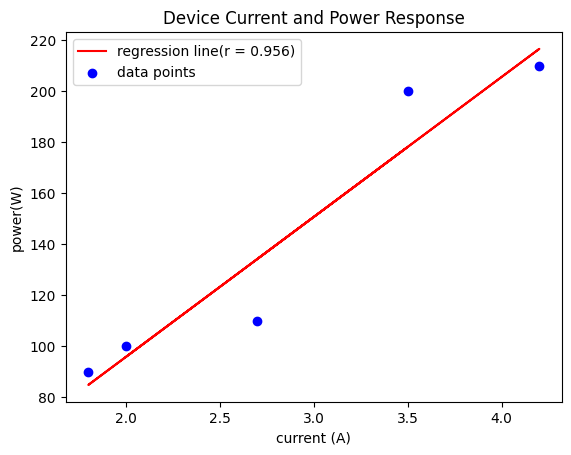

In [121]:
x = device['current']
y = device['power']

#regression line
m, b, r, p_value, std_err= stats.linregress(x,y)
line = m*x + b

plt.plot(x,line,
         color='red',
         label=f'regression line(r = {r:.3f})')

#scatter
plt.scatter(x,y, 
            color='blue',
            label='data points')
plt.title ('Device Current and Power Response')
plt.ylabel ('power(W)')
plt.xlabel ('current (A)')
plt.legend()
plt.show()


# Resistance Test

In [123]:
resistance = pd.read_csv(r"resistance-test.csv")
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.1
1,2,9.1,11.0
2,3,9.3,9.1
3,4,9.8,20.0
4,5,10.5,9.2
5,6,10.4,10.8
6,7,9.5,9.9
7,8,11.0,9.2
8,9,10.4,9.1
9,10,3.0,9.1


In [124]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 392.0 bytes


In [127]:
resistance['Jaguar'].mean()

9.399999999999999

In [135]:
jag_mean = resistance['Jaguar'].mean()
jag_mean

9.399999999999999

In [128]:
pan_mean = resistance['Panther'].mean()
pan_mean

10.75

In [136]:
resistance['Panther'] = resistance['Panther'].fillna(pan_mean)
resistance['Panther']

0     10.10
1     11.00
2      9.10
3     20.00
4      9.20
5     10.80
6      9.90
7      9.20
8      9.10
9      9.10
10    10.75
Name: Panther, dtype: float64

In [137]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   11 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 392.0 bytes


# Bar Graph

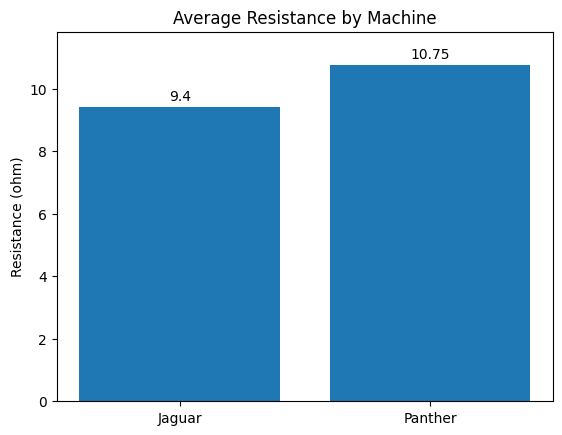

In [146]:
bars = plt.bar(['Jaguar','Panther'], [jag_mean,pan_mean])
plt.title('Average Resistance by Machine')
plt.ylabel('Resistance (ohm)')

# bar labels
plt.bar_label(bars, padding=3)
plt.margins(y=0.1) #10%

plt.show()